In [ ]:
import sys
sys.path.append(r'C:\Users\Madelyn Zelaya\Desktop\Starter_Code\starter_code')

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

In [ ]:
# set the API base URL

url = "https://home.openweathermap.org/api_keys"

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    #except Exception as e:
        #print(f"An error occurred: {e}")
        #print("City not found. Skipping...")
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv('output.csv', index_label='City_ID')

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

Latitude Vs. Temperature

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Set title and labels
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save the figure
plt.savefig('latitude_vs_temperature.png')

# Show plot
plt.show()

Latitude Vs. Humidity

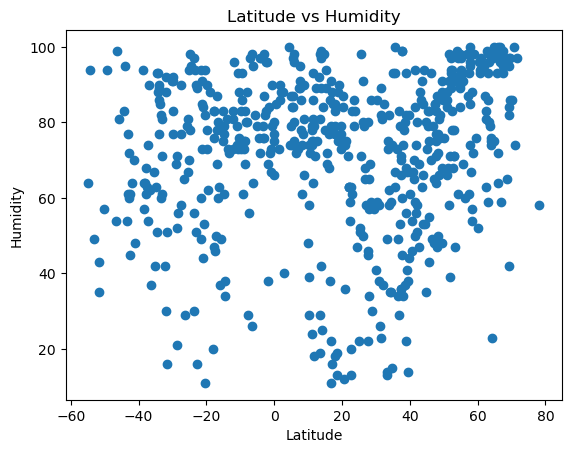

In [20]:
# Extract latitudes and humidities from city_data
city_lat = [data['Lat'] for data in city_data]
city_humidity = [data['Humidity'] for data in city_data]

plt.scatter(city_lat, city_humidity)

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')

# Save the figure
plt.savefig("output1.png")

# Show the plot
plt.show()

Latitude Vs. Cloudiness

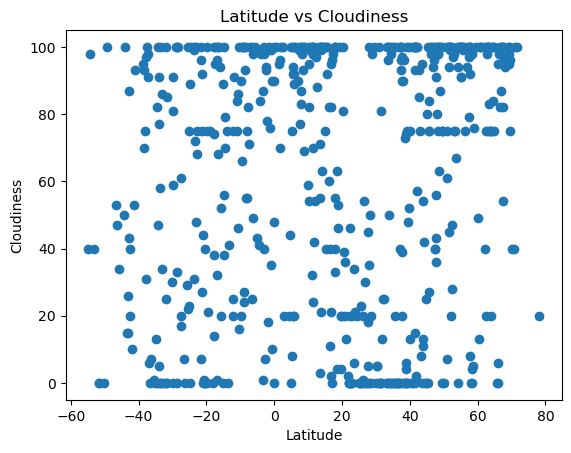

In [21]:
city_lat = [data['Lat'] for data in city_data]
city_cloudiness = [data['Cloudiness'] for data in city_data]

plt.scatter(city_lat, city_cloudiness)

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')

# Save the figure
plt.savefig("output3.png")

# Show the plot
plt.show()

Latitude vs. Wind Speed Plot

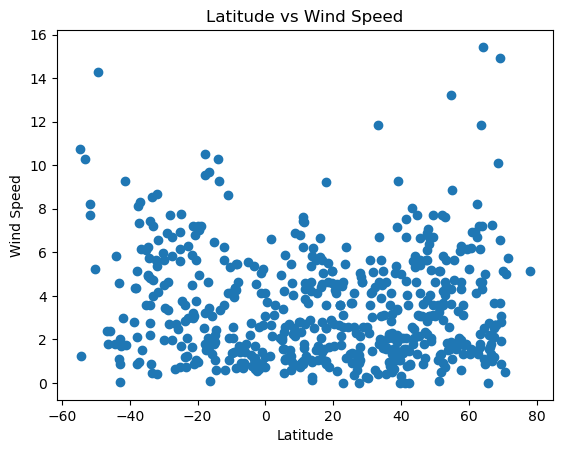

In [24]:
city_lat = [data['Lat'] for data in city_data]
city_wind_speed = [data['Wind Speed'] for data in city_data]

plt.scatter(city_lat, city_wind_speed)

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')

# Save the figure
plt.savefig("output4.png")

# Show the plot
plt.show()